<a href="https://colab.research.google.com/github/syamkakarla98/Beginners_Guide_to_PySpark/blob/main/Beginners_Guide_to%C2%A0PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='tomato'>Beginners Guide to PySpark</font>

## Installation

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. 
* **PySpark 3.0.1**
* **pyy4j 0.10.09**

Follow the steps to install the dependencies:

In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9 

     |████████████████████████████████| 204.2MB 58kB/s 
     |████████████████████████████████| 204kB 44.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=246cec1835b2e48951320cd6fc83cb8b5a3bfe0f168b993b4ec02b6d0cbc4e73
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


Check your installation by creatinf a spark session.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

## Reading Data

### Download Kaggle Movie Dataset

Use the Kaggle API Token(kaggle.json) to download the Movie Dataset

In [ ]:
from google.colab import files

## Upload your kaggle json file (API Token)
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d dinnymathew/usstockprices

 56% 20.0M/35.5M [00:00<00:00, 24.6MB/s]
100% 35.5M/35.5M [00:00<00:00, 55.9MB/s]


In [ ]:
!ls

kaggle.json  sample_data  usstockprices.zip


In [ ]:
!mkdir data

!unzip usstockprices -d data

Archive:  usstockprices.zip
  inflating: data/stocks_price_final.csv  


In [ ]:
!ls -l data/

total 218952
-rw-r--r-- 1 root root 224205096 Jul 24 15:28 stocks_price_final.csv


## Import Modules

In [ ]:
from pyspark.sql import functions as f

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

## Read Data

In [ ]:
# Before changing schema
b_data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep = ',',
    header = True,
    )

b_data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [ ]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [ ]:
data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )

In [ ]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [ ]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [ ]:
data = data.withColumnRenamed('market.cap', 'market_cap')

## Inspect the data

In [ ]:
# prints Schema of thte data
data.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(symbol,StringType,true),StructField(data,DateType,true),StructField(open,DoubleType,true),StructField(high,DoubleType,true),StructField(low,DoubleType,true),StructField(close,DoubleType,true),StructField(volume,IntegerType,true),StructField(adjusted,DoubleType,true),StructField(market_cap,StringType,true),StructField(sector,StringType,true),StructField(industry,StringType,true),StructField(exchange,StringType,true)))


In [ ]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market_cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [ ]:
data.head(3)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [ ]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [ ]:
data.first()

Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [ ]:
data.describe().show()

+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|summary|              _c0| symbol|              open|              high|               low|             close|            volume|          adjusted|market_cap|          sector|            industry|exchange|
+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|  count|          1729034|1729034|           1726301|           1726301|           1726301|           1726301|           1725207|           1726301|   1729034|         1729034|             1729034| 1729034|
|   mean|         864517.5|   null|15070.071703341051| 15555.06726813709|14557.808227578982|15032.714854330707|1397692.1627885813|  14926.1096887955|      null|        

In [ ]:
data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [ ]:
data.count()

1729034

In [ ]:
data.distinct().count() 

1729034

In [ ]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



## Column Operations/Manipulations

In [ ]:
data = data.withColumn('date', data.data)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [ ]:
data = data.withColumnRenamed('date', 'data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|data_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

In [ ]:
data = data.drop('data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [ ]:
data.select(['open', 'high', 'low', 'close', 'volume', 'adjusted']).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              open|              high|               low|             close|            volume|          adjusted|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|           1726301|           1726301|           1726301|           1726301|           1725207|           1726301|
|   mean|15070.071703341051| 15555.06726813709|14557.808227578982|15032.714854330707|1397692.1627885813|  14926.1096887955|
| stddev|1111821.8002863196|1148247.1953514954|1072968.1558434265|1109755.9294000647| 5187522.908169119|1101877.6328940107|
|    min|             0.072|             0.078|             0.052|             0.071|                 0|         -1.230099|
|    max|      1.60168176E8|      1.61601456E8|      1.55151728E8|      1.58376592E8|         656504200|      1.57249392E8|
+-------

In [ ]:
data.groupBy('sector').count().show()

+--------------------+------+
|              sector| count|
+--------------------+------+
|       Miscellaneous| 50221|
|         Health Care|316175|
|    Public Utilities| 72836|
|              Energy| 87494|
|Consumer Non-Dura...| 78080|
|             Finance|303180|
|    Basic Industries| 97323|
|       Capital Goods|133122|
|          Technology|229799|
|   Consumer Services|272393|
|   Consumer Durables| 48404|
|      Transportation| 40007|
+--------------------+------+



In [ ]:
sec_x =  data.select(['sector', 'open', 'close', 'adjusted']).groupBy('sector').mean().collect()

Convert the data into **list**

In [ ]:
for row in sec_x:
  print(list(row), end='\n')

['Miscellaneous', 52.03839496900624, 52.06362854950968, 51.809730336322794]
['Health Care', 119.96763306523218, 119.07806125419022, 118.97394778016198]
['Public Utilities', 35.580777352394705, 35.58528245861945, 34.7301556850045]
['Energy', 24.456589891261007, 24.427350302158175, 23.684714263001084]
['Consumer Non-Durables', 43.32860274612677, 43.33038601364613, 42.81762456569033]
['Finance', 37.77466706818995, 37.77900231428883, 37.10028522718097]
['Basic Industries', 266410.35470107093, 265750.3613671152, 263865.51070311887]
['Capital Goods', 60.4885436328285, 60.516554835687764, 59.97512253879351]
['Technology', 49.516045118395034, 49.53479888748186, 49.25234033754425]
['Consumer Services', 55.078867342590755, 55.055247536473416, 54.36187827846176]
['Consumer Durables', 391.03153998497794, 390.10415506572406, 389.6417639493677]
['Transportation', 37.30503242702824, 37.29532668104838, 36.80231922791236]


Convert the data into **dictionary**

In [ ]:
for row in sec_x:
  print(row.asDict(), end='\n')

{'sector': 'Miscellaneous', 'avg(open)': 52.03839496900624, 'avg(close)': 52.06362854950968, 'avg(adjusted)': 51.809730336322794}
{'sector': 'Health Care', 'avg(open)': 119.96763306523218, 'avg(close)': 119.07806125419022, 'avg(adjusted)': 118.97394778016198}
{'sector': 'Public Utilities', 'avg(open)': 35.580777352394705, 'avg(close)': 35.58528245861945, 'avg(adjusted)': 34.7301556850045}
{'sector': 'Energy', 'avg(open)': 24.456589891261007, 'avg(close)': 24.427350302158175, 'avg(adjusted)': 23.684714263001084}
{'sector': 'Consumer Non-Durables', 'avg(open)': 43.32860274612677, 'avg(close)': 43.33038601364613, 'avg(adjusted)': 42.81762456569033}
{'sector': 'Finance', 'avg(open)': 37.77466706818995, 'avg(close)': 37.77900231428883, 'avg(adjusted)': 37.10028522718097}
{'sector': 'Basic Industries', 'avg(open)': 266410.35470107093, 'avg(close)': 265750.3613671152, 'avg(adjusted)': 263865.51070311887}
{'sector': 'Capital Goods', 'avg(open)': 60.4885436328285, 'avg(close)': 60.5165548356877

convert data into pandas **datafame**

In [ ]:
sec_df =  data.select(['sector', 'open', 'close', 'adjusted']).groupBy('sector').mean().toPandas()

In [ ]:
sec_df

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
6,Basic Industries,266410.354701,265750.361367,263865.510703
7,Capital Goods,60.488544,60.516555,59.975123
8,Technology,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878


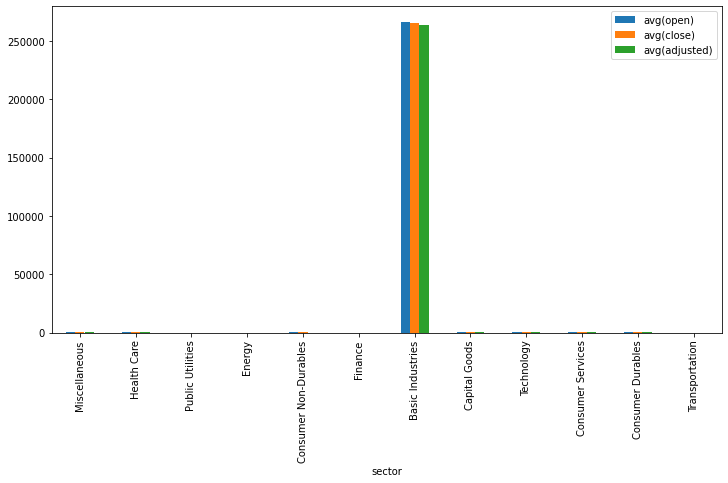

In [ ]:
sec_df.plot(kind = 'bar', x='sector', y = sec_df.columns.tolist()[1:], figsize=(12, 6))

Remove **basic industries** from the plot and view it again...

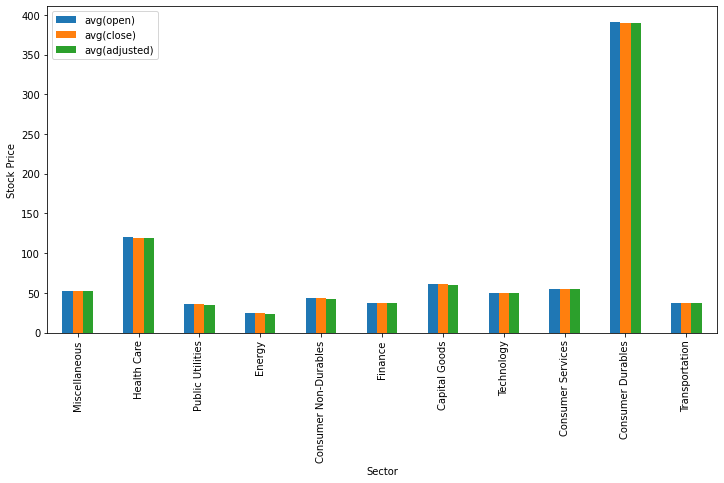

In [ ]:
ind = list(range(12))
ind.pop(6)
sec_df.iloc[ind ,:].plot(kind = 'bar', x='sector', y = sec_df.columns.tolist()[1:], figsize=(12, 6), ylabel = 'Stock Price', xlabel = 'Sector')
plt.show()

In [ ]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

industries_x.head()

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Miscellaneous manufacturing industries,15.660586,15.650935,15.369819


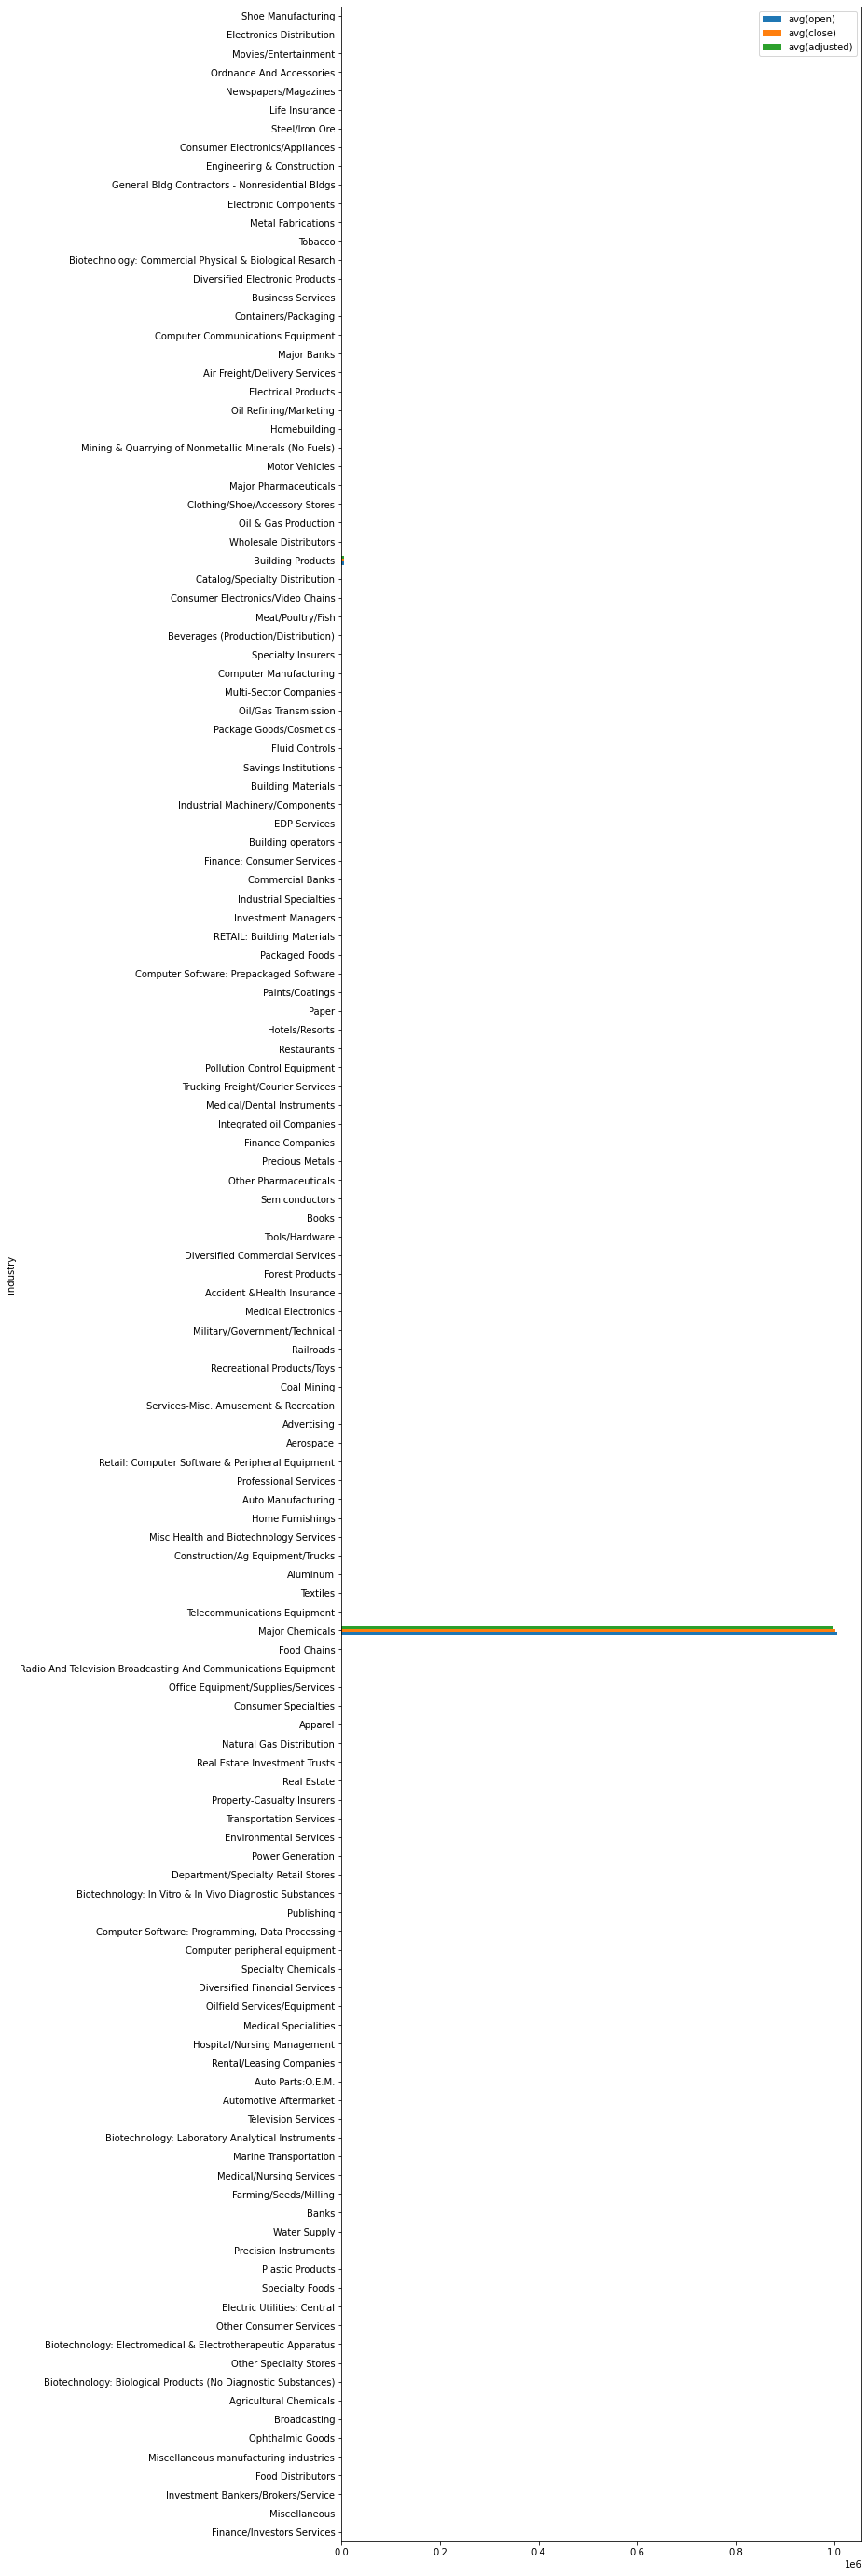

In [ ]:
industries_x.plot(kind = 'barh', x='industry', y = industries_x.columns.tolist()[1:], figsize=(10, 50))

Remove **major chemicals** and **building products** to view the rest data clearly

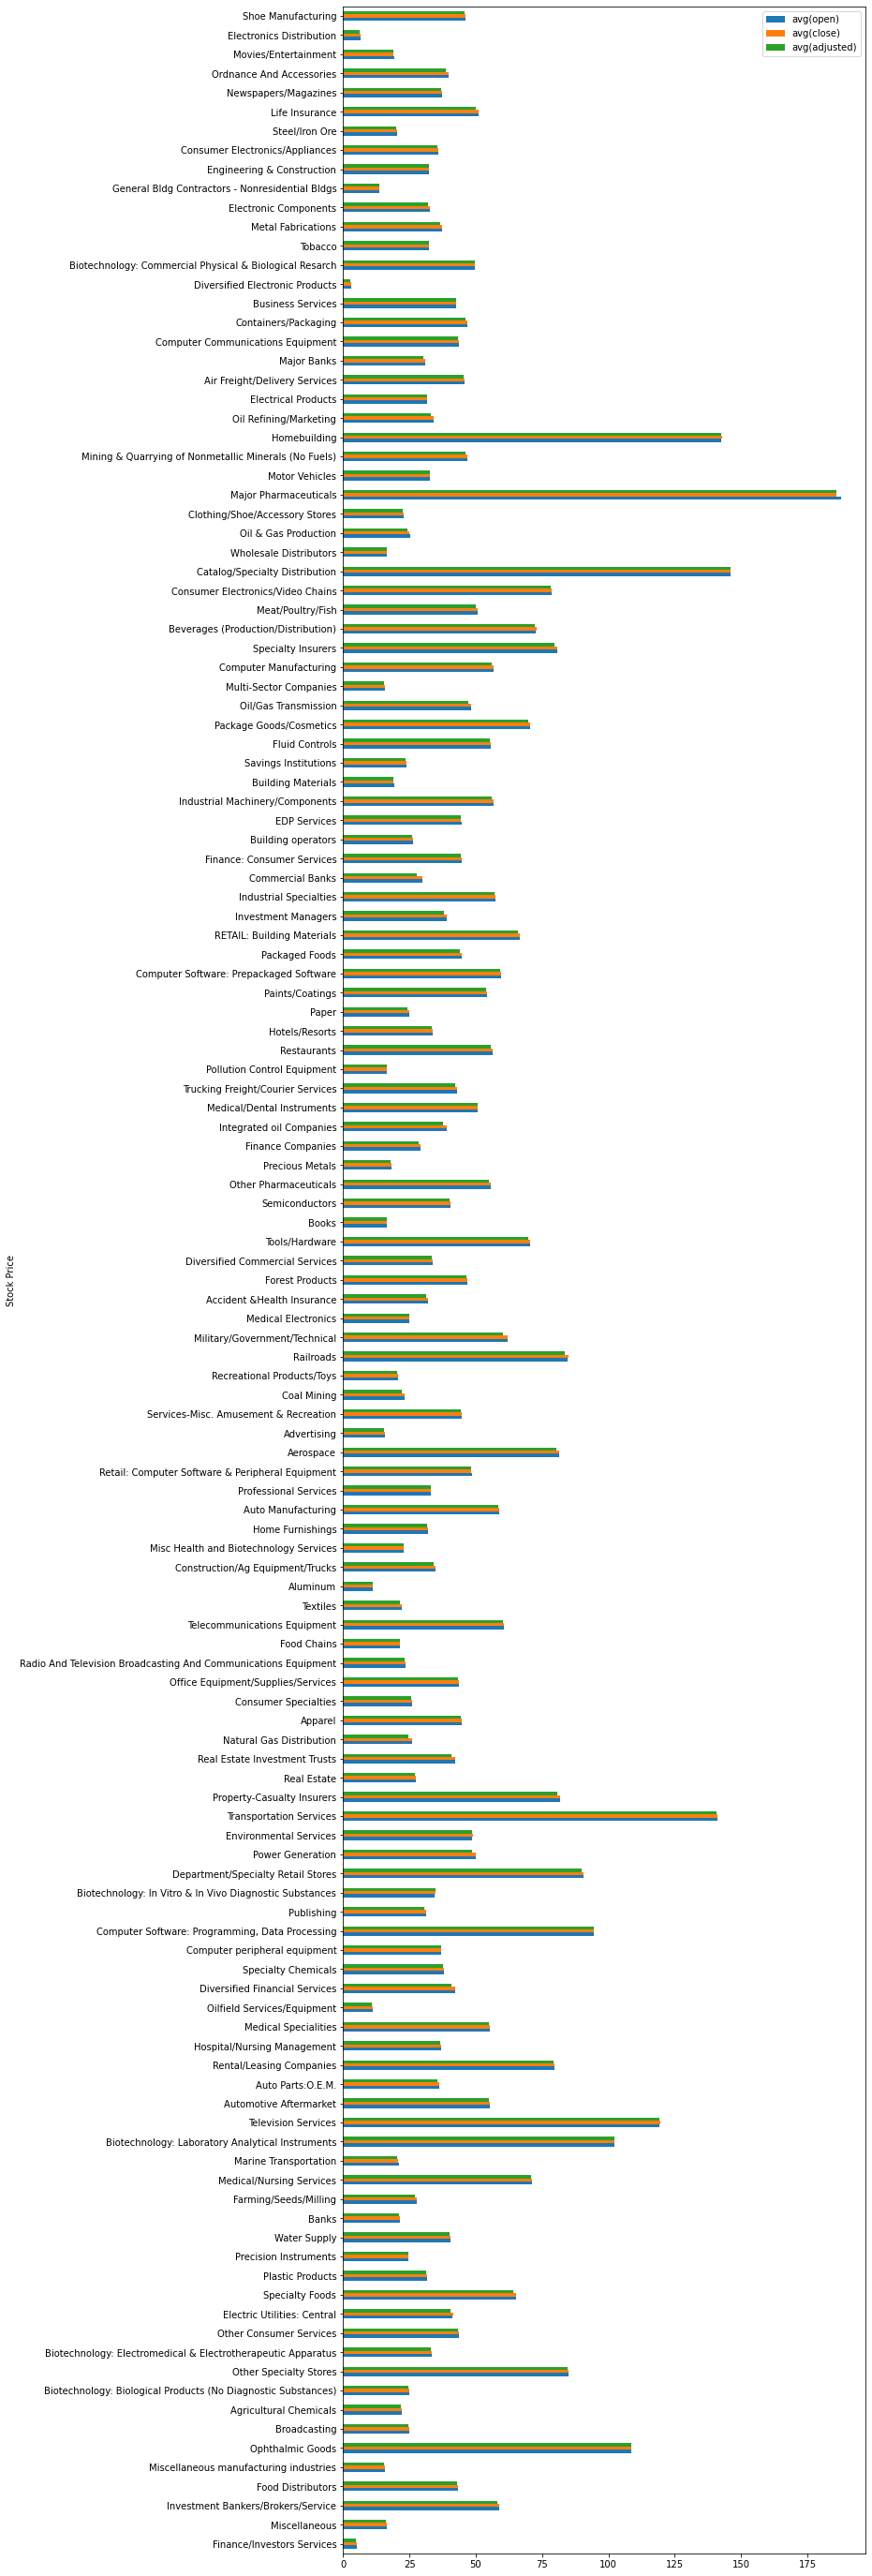

In [ ]:
q  = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]

q.plot(kind = 'barh', x='industry', y = q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel = 'Industry')

plt.show()

In [ ]:
import pyspark.sql.functions as f

health = data.filter(f.col('sector') == 'Health Care')

health.show()

+---+------+----------+----+----+----+-----+------+--------+----------+-----------+--------------------+--------+
|_c0|symbol|      data|open|high| low|close|volume|adjusted|market_cap|     sector|            industry|exchange|
+---+------+----------+----+----+----+-----+------+--------+----------+-----------+--------------------+--------+
|218|    YI|2019-01-02|6.02|6.11| 6.0|  6.0|  4100|     6.0|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|219|    YI|2019-01-03|6.02|6.05|5.95| 6.05|  4700|    6.05|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|220|    YI|2019-01-04|6.05|6.97|6.05| 6.78| 10300|    6.78|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|221|    YI|2019-01-07| 6.8| 7.0|6.55|  7.0| 10100|     7.0|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|222|    YI|2019-01-08| 7.0|9.76| 6.9| 9.55| 60300|    9.55|  $560.04M|Health Care|Medical/Nursing S...|  NASDAQ|
|223|    YI|2019-01-09|9.56|10.8| 9.5| 9.62| 38500|    9.62|  $560.04M|Health Care|Medic

### How to use Aggregation

In [ ]:
from pyspark.sql.functions import col, min, max, avg, lit

data.groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 
         avg("open").alias("Average Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"), 
         avg("close").alias("Average Closing"), 

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 
         avg("adjusted").alias("Average Adjusted Closing"), 

      ).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-07-22|0.147          |1059.98999     |52.03839496900624 |0.1361         |1035.829956    |52.06362854950968 |0.1361                  |1035.829956             |51.809730336322794      |
|Health Care          |2019-01-02|2020-07-22|0.072          |186000.0       |119.96763306523218|0.071       

Get the min, max, avg data w.r.t sectors from **Jan 2019** to **Jan 2020**

In [ ]:
data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')) )\
    .groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 
         avg("open").alias("Average Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"), 
         avg("close").alias("Average Closing"), 

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 
         avg("adjusted").alias("Average Adjusted Closing"), 

      ).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16           |690.0          |51.51619596530094 |0.16           |691.099976     |51.54953412269053 |0.16                    |691.099976              |51.21050733851903       |
|Health Care          |2019-01-02|2020-01-31|0.072          |186000.0       |146.77561975676196|0.071       

Plot the timeseries data od **technology** sector stock trade

In [ ]:
tech = data.where(col('sector') == 'Technology').select('data', 'open', 'close', 'adjusted')

tech.show()

+----------+----+-----+--------+
|      data|open|close|adjusted|
+----------+----+-----+--------+
|2019-01-02|8.51| 8.55|    8.55|
|2019-01-03| 8.5| 8.59|    8.59|
|2019-01-04|8.72| 8.88|    8.88|
|2019-01-07|8.88| 8.86|    8.86|
|2019-01-08|8.93|  9.4|     9.4|
|2019-01-09|9.46| 9.43|    9.43|
|2019-01-10|9.41|  9.4|     9.4|
|2019-01-11|9.37| 9.51|    9.51|
|2019-01-14|9.45| 9.48|    9.48|
|2019-01-15| 9.5| 9.52|    9.52|
|2019-01-16|9.53| 9.52|    9.52|
|2019-01-17|9.22|  9.5|     9.5|
|2019-01-18|9.57| 9.41|    9.41|
|2019-01-22|9.31|  8.9|     8.9|
|2019-01-23|8.93| 8.83|    8.83|
|2019-01-24|8.84| 8.73|    8.73|
|2019-01-25| 8.8| 8.93|    8.93|
|2019-01-28|8.87| 8.83|    8.83|
|2019-01-29|8.82| 8.83|    8.83|
|2019-01-30| 8.9| 8.74|    8.74|
+----------+----+-----+--------+
only showing top 20 rows



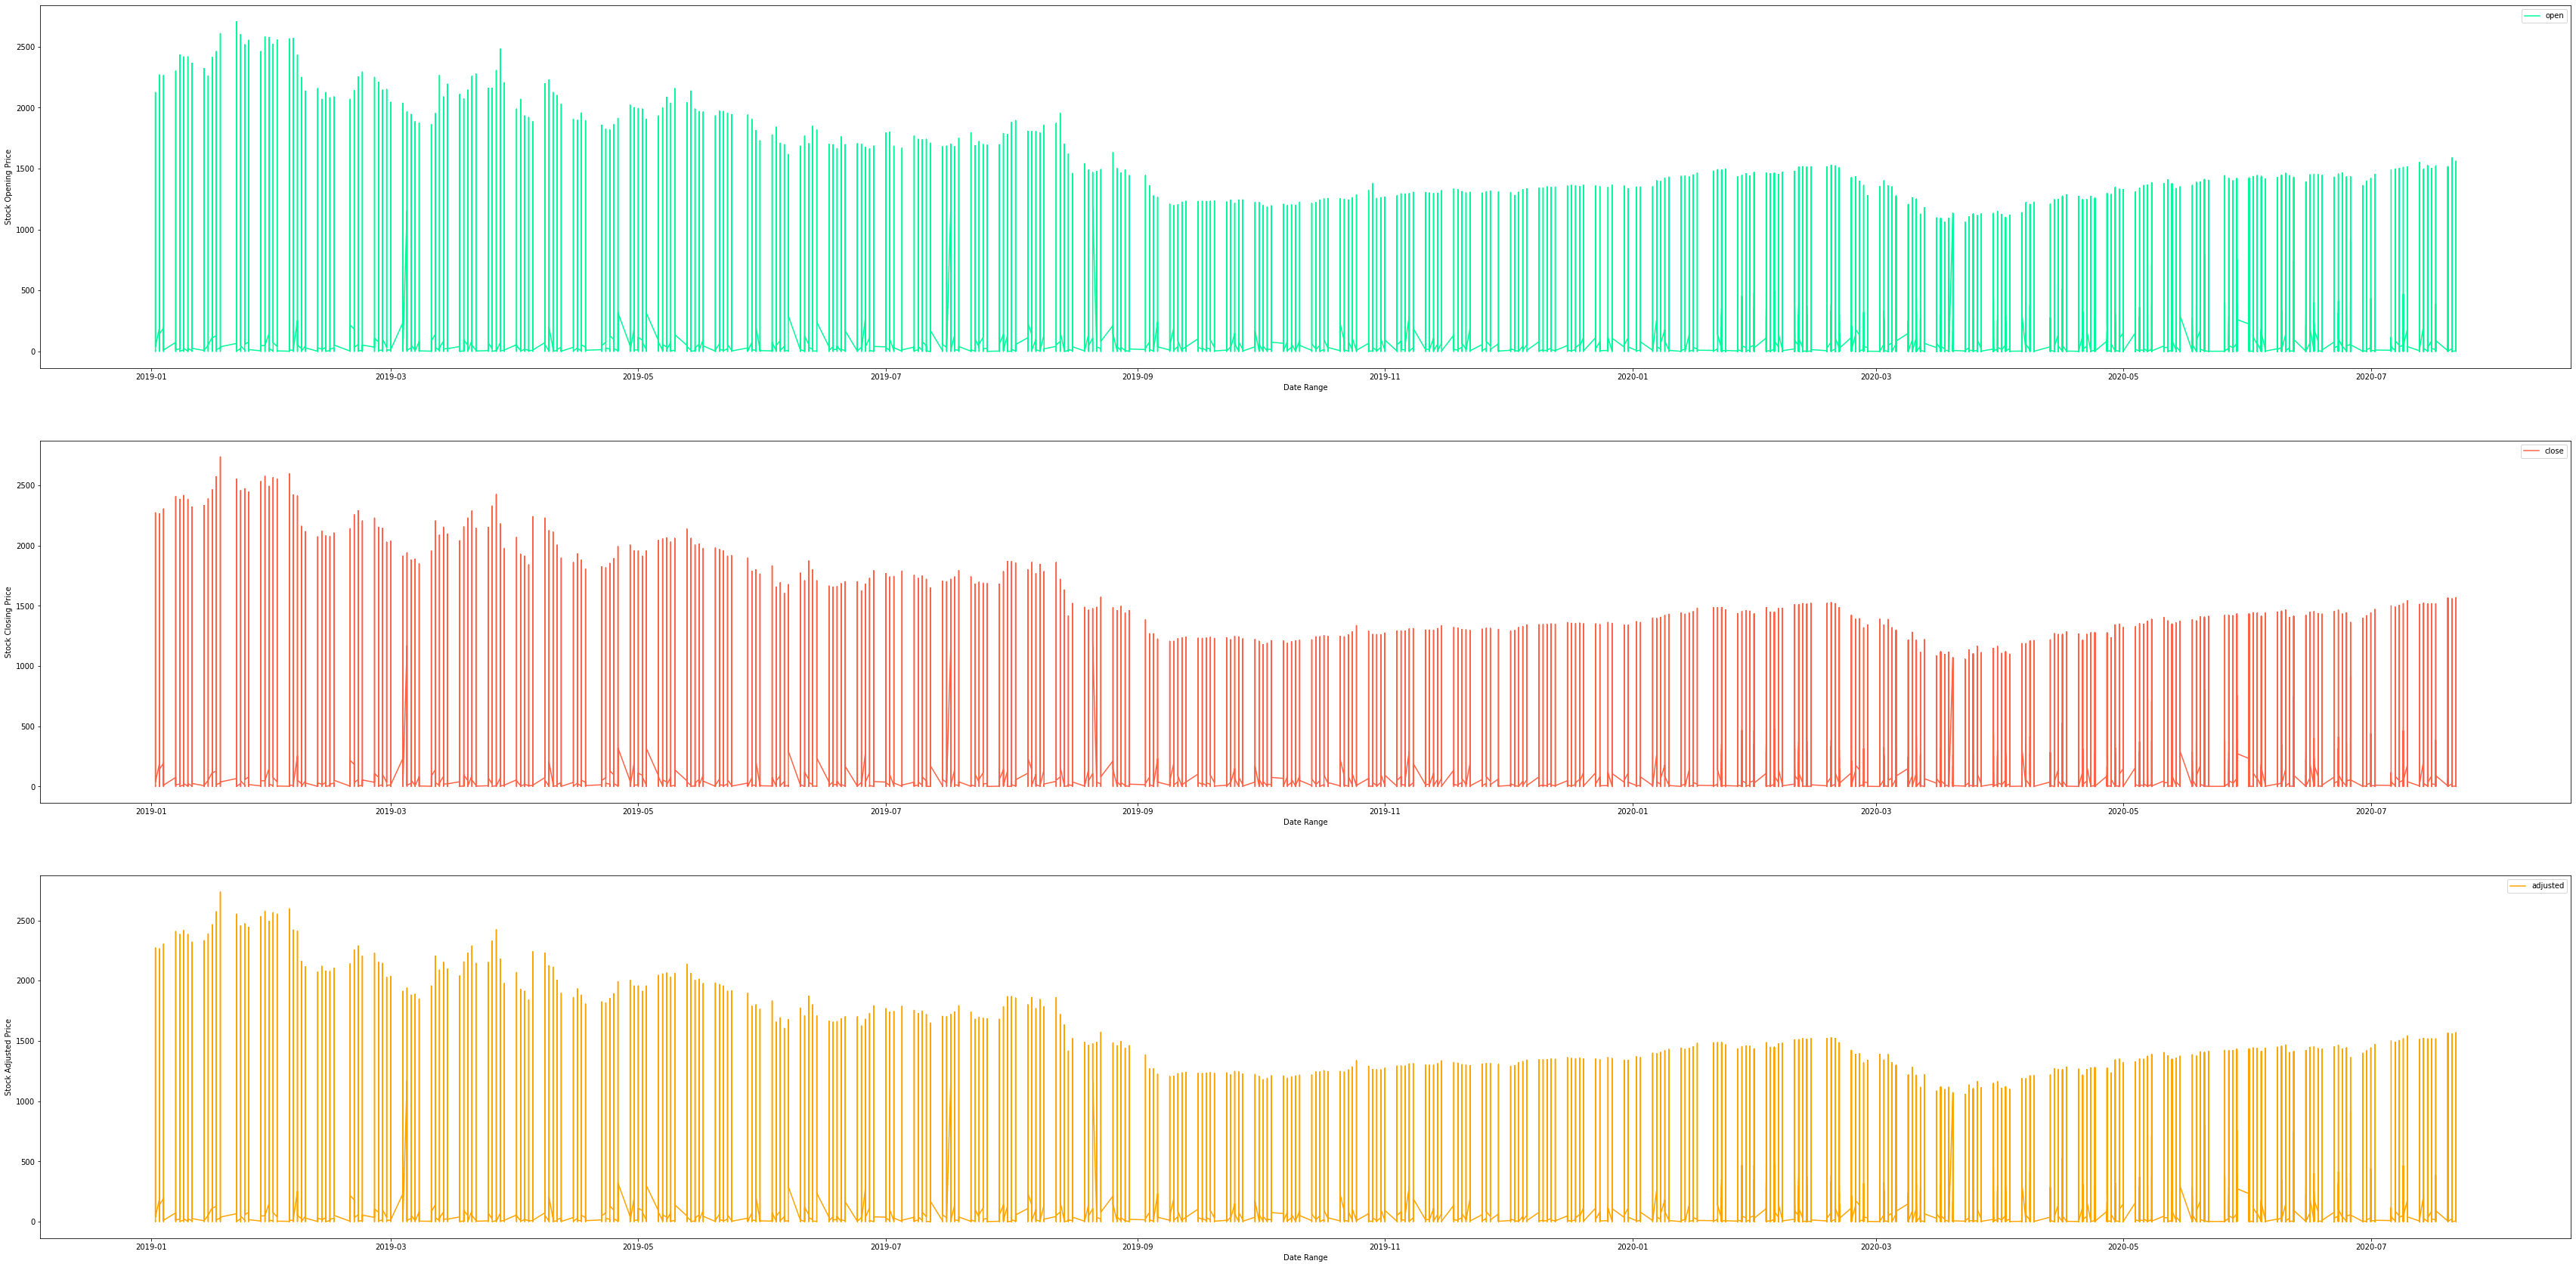

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))

tech.toPandas().plot(kind = 'line', x = 'data', y='open', xlabel = 'Date Range', ylabel = 'Stock Opening Price', ax = axes[0], color = 'mediumspringgreen')

tech.toPandas().plot(kind = 'line', x = 'data', y='close', xlabel = 'Date Range', ylabel = 'Stock Closing Price', ax = axes[1], color = 'tomato')

tech.toPandas().plot(kind = 'line', x = 'data', y='adjusted', xlabel = 'Date Range', ylabel = 'Stock Adjusted Price', ax = axes[2], color = 'orange')

plt.show()

In [ ]:
data.select('sector').show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows



In [ ]:
data.select(['open', 'close', 'adjusted']).show(5)

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [ ]:
data.filter(data.adjusted.between(100.0, 500.0)).show(5)

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| _c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market.cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|

In [ ]:
from pyspark.sql.functions import col, lit

data.filter( (col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

In [ ]:
data.select('open', 'close', f.when(data.adjusted >= 200.0, 1).otherwise(0)).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



In [ ]:
data.select('sector', 
            data.sector.rlike('^[B,C]').alias('Sector Starting with B or C')
            ).distinct().show()

+--------------------+---------------------------+
|              sector|Sector Starting with B or C|
+--------------------+---------------------------+
|         Health Care|                      false|
|       Capital Goods|                       true|
|Consumer Non-Dura...|                       true|
|    Public Utilities|                      false|
|   Consumer Durables|                       true|
|             Finance|                      false|
|      Transportation|                      false|
|       Miscellaneous|                      false|
|   Consumer Services|                       true|
|              Energy|                      false|
|    Basic Industries|                       true|
|          Technology|                      false|
+--------------------+---------------------------+



In [ ]:
data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714286| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938776| 16.35987909030613|16.148959322959183|
|Investment Banker...| 58.95058094575029|58.983085960826294|58.157837258903065|
|   Food Distributors|43.274508569354644| 43.27317810574859|42.910476083578644|
|Miscellaneous man...|15.660586409948984| 15.65093486096939|15.369818847193866|
|    Ophthalmic Goods|108.50137892138572|108.54045987608258|108.52516121052633|
|        Broadcasting|24.916787464825223| 24.91738845539514|24.699102029625255|
|Agricultural Chem...|22.046413928996614|22.042051076318053|21.635093418154767|
|Biotechnology: Bi...|24.808083192324542|24.803587149935442| 24.74507997827319|
|Other Specialty S...| 84.80718810562882